In [1]:
import bd
import pickle
import numpy as np
from Point import Point

import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
#constants
ratio = 2
black = (0,0,0)
red = (1,0,0)
width, height = 1000, 1000

#to keep
l_arm = False
r_arm = True
l_leg = True
r_leg = True
neck = True
general = True

to_keep = [l_arm, r_arm, l_leg, r_leg, neck, general]

In [3]:
myPaintings = pickle.load(open('../../Python Scripts/myPaintings21400.p', 'rb'))


## HERE go buc corrections to the catalog, which are numerous.... 
myPaintings[7465][1] = 'http://www.wga.hu/art/c/casa/portrait_C.jpg' ## and NOT portrait_c (lowercase), the original...


In [4]:
#6 seconds in my computer
all_bodies = bd.construct_body_list(21400, myPaintings)

In [5]:
all_relative_angles = bd.all_relative_angles(all_bodies)
deviation = bd.compute_std_deviation(all_relative_angles)

In [6]:
ll = bd.all_bodies_mean_limb_length(all_bodies)  * np.array(ratio)
ml = bd.middle_mean_length(all_bodies) * ratio

In [7]:
resized_bodies = bd.resize_bodies(all_bodies, ml)
mlb = bd.middle_mean_length(resized_bodies)

In [8]:
base_body = bd.angles_to_body(bd.angles(), ll, Point(500,300))
print ll

[  78.76108245   78.5162604   143.65955379  108.75055578  140.72498532
  105.67785164  236.14645864  164.28877967  175.92032288  235.67802388
  163.71555608  175.78221254  117.18822694    0.            0.            0.
    0.        ]


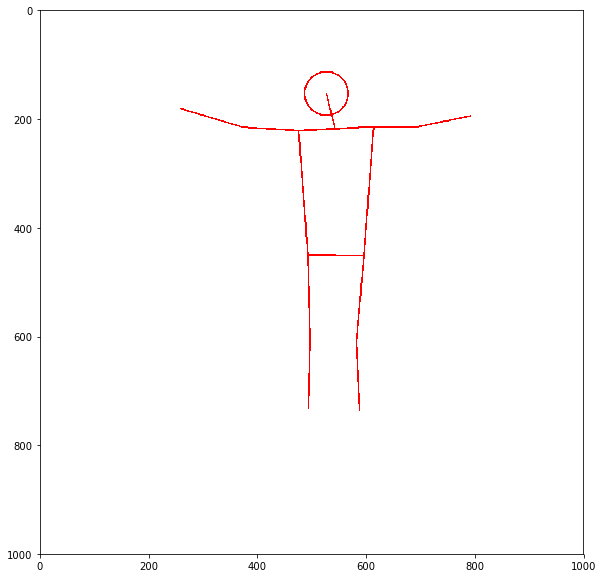

In [9]:
body_id = 3525
img = np.ones((height, width, 3))


resized_bodies[body_id].draw(img, red)


plt.imshow(img)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)

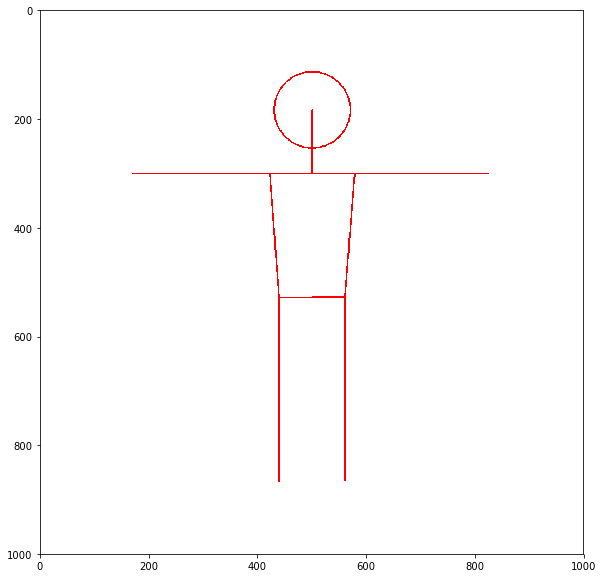

In [10]:
img = np.ones((height, width, 3))

base_body.draw(img, red)


plt.imshow(img)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)

In [11]:
d,i = bd.get_n_nearest_neighbor(all_relative_angles, base_body, deviation, to_keep, n=100, dist=50)
print i

[[ 3525 13098 13095 16468 11237 41662 26639 28740 65465 23603 20827 42298
  31218 37743 63790 30645 56459 21808 52372  3418 59290 61982 32912 10093
  23625 31313 30476 43532 66309 61266 15129 40715 26755 10701  4650 40106
   3594  3417 11958 43104 67803 15731 25475 25590 43575 22769 41737 32861
  56145 32806 38244 38733  3630 53585 35215 61263 16894 60831 51819  1306
  52373 37964   264 23744 54096 15712 52238  1573 24599 28652 61496 12612
  10888 57218 23997 18695 64959 20458 38029 23545 38196 23549 38492  2328
   9737 65810 29146  5006 34427 16148 10852  9151 28993 58035 44590 11779
    720 59195 23537 21702]]


In [12]:
#to change the number of random paintings, change n
n = 10
bd.p_values_random_hypothesis(n, myPaintings, all_bodies, all_relative_angles, deviation, 'a')